In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [41]:
df = pd.read_json(
    '/Users/nikhil/Code/Research/etna/experiments/ocaml-experiments/parsed/rare.json')

In [42]:
df = df.drop(["workload", "discards", "passed", "property"], axis=1)
df

,foundbug,strategy,mutant,time
0,True,crowbarType,rare_2,62.356795
1,False,crowbarType,rare_2,599.995443
2,True,crowbarType,rare_2,188.843289
3,False,crowbarType,rare_2,599.996009
4,True,crowbarType,rare_2,261.961106
...,...,...,...,...
137,True,afl2Type,rare_1,0.769996
138,True,afl2Type,rare_1,0.752007
139,True,afl2Type,rare_1,0.449998
140,False,aflType,rare_3,600.702280


In [43]:
df['mutant_number'] = df['mutant'].apply(
    lambda x: int(re.search(r'\d+', x).group()))
df

,foundbug,strategy,mutant,time,mutant_number
0,True,crowbarType,rare_2,62.356795,2
1,False,crowbarType,rare_2,599.995443,2
2,True,crowbarType,rare_2,188.843289,2
3,False,crowbarType,rare_2,599.996009,2
4,True,crowbarType,rare_2,261.961106,2
...,...,...,...,...,...
137,True,afl2Type,rare_1,0.769996,1
138,True,afl2Type,rare_1,0.752007,1
139,True,afl2Type,rare_1,0.449998,1
140,False,aflType,rare_3,600.702280,3


In [44]:
avg_time_df = df.groupby(['mutant_number', 'strategy'])[
    'time'].mean().reset_index()

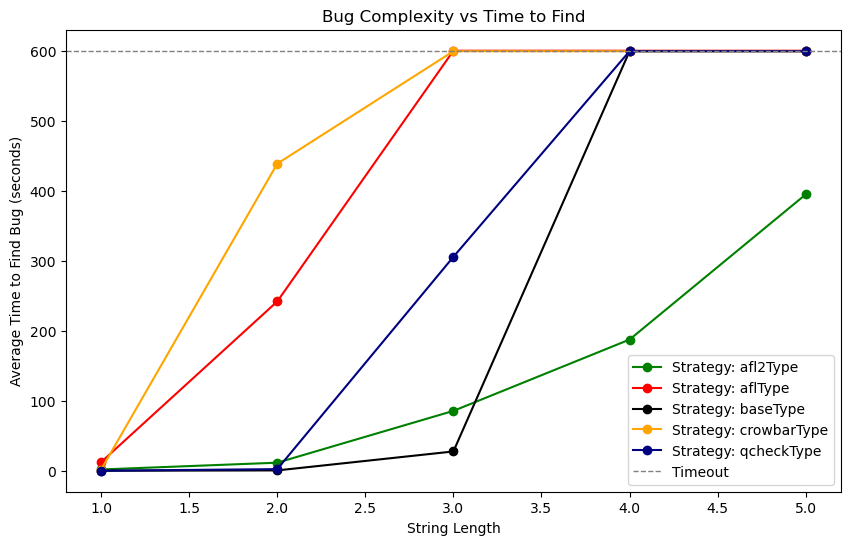

In [45]:
# Define the colors for different strategies
colors = {'crowbarType': 'orange', 'baseType': 'black', 'qcheckType': 'navy', 'aflType': "red", 'afl2Type': "green"}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for strategy in avg_time_df['strategy'].unique():
    subset = avg_time_df[avg_time_df['strategy'] == strategy]
    plt.plot(subset['mutant_number'], subset['time'],
             color=colors[strategy],
             marker='o',
             linestyle='-',
             label=f'Strategy: {strategy}')

# Adding labels and title
plt.xlabel('String Length')
plt.ylabel('Average Time to Find Bug (seconds)')
plt.title('Bug Complexity vs Time to Find')

plt.axhline(y=600, color='gray', linestyle='--', linewidth=1, label='Timeout')

# Creating legend
plt.legend()


# Display the plot
plt.show()

In [46]:
df.sort_values(by='time')

,foundbug,strategy,mutant,time,mutant_number
53,True,baseType,rare_1,0.002037,1
22,True,qcheckType,rare_1,0.002769,1
48,True,baseType,rare_1,0.002876,1
56,True,baseType,rare_1,0.004636,1
55,True,baseType,rare_1,0.005933,1
...,...,...,...,...,...
7,False,crowbarType,rare_2,600.036906,2
46,False,aflType,rare_5,600.702280,5
140,False,aflType,rare_3,600.702280,3
43,False,qcheckType,rare_3,600.702280,3
